In [1]:

import os
from natsort import natsorted
import shutil
import subprocess
from string import Template
import pandas as pd
import numpy as np
import os
import matplotlib.ticker as ticker
import sys
from glob import glob
from random import random, shuffle
from lammps import lammps, PyLammps
lmp = lammps()
PyL = PyLammps(ptr=lmp)
from math import nan
from ase.io import read, write

def create_phonon_files(file_path, pair, pot_met, data_file, pa, dim, band, band_path, band_points):
    
    if not os.path.exists(file_path):
        os.makedirs(file_path, exist_ok=True)
    
    temp_loc = "./template/"
    des_path = file_path
    
    with open(f'{temp_loc}/band.conf', 'r') as file:
        file_lines = file.readlines()
        
    template_file = ''.join(file_lines)
    temp_input_file = Template(template_file)
    params_dict = {'des_band_val': str(band), 'des_band_path': str(band_path), 'des_band_points': str(band_points)}
    new_input_file = temp_input_file.substitute(params_dict)
    
    with open(f'{des_path}/band.conf', 'w') as destination:
        destination.write(new_input_file)
        
        
    with open(f'{temp_loc}/phonon.sh', 'r') as file:
        file_lines = file.readlines()
        
    template_file = ''.join(file_lines)
    temp_input_file = Template(template_file)
    params_dict = { 'des_pa': str(pa), 'des_dim': str(dim),}
    new_input_file = temp_input_file.substitute(params_dict)
    
    with open(f'{des_path}/phonon.sh', 'w') as destination:
        destination.write(new_input_file)
    
    with open(f'{temp_loc}/in-2.lammps', 'r') as file:
        file_lines = file.readlines()
        
    template_file = ''.join(file_lines)
    temp_input_file = Template(template_file)
    params_dict = {'des_pair': str(pair), 'des_pot_met': str(pot_met)}
    new_input_file = temp_input_file.substitute(params_dict)
    
    with open(f'{des_path}/in-2.lammps', 'w') as destination:
        destination.write(new_input_file)
        
    with open(f'{temp_loc}/in-1.lammps', 'r') as file:
        file_lines = file.readlines()
        
    template_file = ''.join(file_lines)
    temp_input_file = Template(template_file)
    params_dict = {'des_pair': str(pair), 'des_pot_met': str(pot_met), 'des_data': str(data_file)}
    new_input_file = temp_input_file.substitute(params_dict)
    
    with open(f'{des_path}/in-1.lammps', 'w') as destination:
        destination.write(new_input_file)

        
def get_phonon_file(file_path = '',  pair = "eam", pot_met ='/global/cfs/projectdirs/m2090/bilvin/Cu_Symbolic_Final/Cu_SR2.eam', data_file = "before_min.data", data_format=None,
                    pa = "0.25 0 0    0 0.25 0    0 0 0.25", dim ="1 1 1", 
                    band="0 0 0    0.5 0 0.5    0.625 0.25 0.625    0.375 0.375 0.75    0 0 0    0.5 0.5 0.5    0.5 0.25 0.75    0.5 0 0.5", 
                    band_path="$$\Gamma$$ X U K $$\Gamma$$ L W X", band_points=101):

    
    create_phonon_files(file_path=file_path, pair=pair, pot_met=pot_met, data_file = "before_min.data",
                        pa=pa, dim=dim, band=band, band_path=band_path, band_points=band_points)
    
    if data_format is None:
        shutil.copy(data_file, f"{file_path}/before_min.data")
    else:
        shutil.copy(data_file, f"{file_path}/data_copied")
        struct = read(f"{file_path}/data_copied", format=data_format)
        write(f"{file_path}/before_min.data", struct, format='lammps-data', atom_style="atomic",  force_skew=True)
        
    subprocess.run(f"bash phonon.sh", shell=True, cwd=file_path)
                    
    return None


met="Cu"
# change file path, pair for pairtype, pot_met for coorect given potential file name and its keywords, data_file for input data give ase format of the file in data format if its not lammps datafile, all others are tag for bands
get_phonon_file(file_path = "./trial-SR2", data_file = "/global/cfs/projectdirs/m2090/bilvin/Cu_Symbolic_Final/Surface_structures/Cu_FCC.POSCAR", data_format="vasp")





LAMMPS (2 Aug 2023 - Update 2)
LAMMPS output is captured by PyLammps wrapper
  using 2 OpenMP thread(s) per MPI task
LAMMPS (2 Aug 2023 - Update 2)
  using 2 OpenMP thread(s) per MPI task

The 'box' command has been removed and will be ignored

Reading data file ...
  triclinic box = (0 0 0) to (14.535431 14.535431 14.535431) with tilt (0 0 0)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  256 atoms
  read_data CPU = 0.001 seconds
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 9.9998
  ghost atom cutoff = 9.9998
  binsize = 4.9999, bins = 3 3 3
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair eam, perpetual
      attributes: half, newton on
      pair build: half/bin/newton/tri
      stencil: half/bin/3d/tri
      bin: standard
Setting up cg style minimization ...
  Unit style    : metal
  Current step  : 0
Per MPI rank memory allocation (min/avg/max) =

/global/homes/b/bvarug/.conda/envs/symb_tf2/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_lattice']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/global/homes/b/bvarug/.conda/envs/symb_tf2/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_positions']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/global/homes/b/bvarug/.conda/envs/symb_tf2/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['std_types']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/global/homes/b/bvarug/.conda/envs/symb_tf2/lib/python3.9/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) in

displacement 1 / 1
Figure(640x480)
writing force sets
writing force constants
writing POSCAR file: POSCAR
        _
  _ __ | |__   ___  _ __   ___   _ __  _   _
 | '_ \| '_ \ / _ \| '_ \ / _ \ | '_ \| | | |
 | |_) | | | | (_) | | | | (_) || |_) | |_| |
 | .__/|_| |_|\___/|_| |_|\___(_) .__/ \__, |
 |_|                            |_|    |___/
                                      2.31.0

Compiled with OpenMP support (max 2 threads).
Python version 3.9.18
Spglib version 2.5.0

"band.conf" was read as phonopy configuration file.
Crystal structure was read from "POSCAR".
Unit of length: angstrom
Band structure mode
Settings:
  Supercell: [1 1 1]
  Primitive matrix:
    [0.25 0.   0.  ]
    [0.   0.25 0.  ]
    [0.   0.   0.25]
Spacegroup: Fm-3m (225)
Number of symmetry operations in supercell: 12288
Use -v option to watch primitive cell, unit cell, and supercell structures.

Force constants are read from "FORCE_CONSTANTS".
Force constants format was transformed to compact format.
Array sha

In [2]:

import yaml
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.electronic_structure.bandstructure import Kpoint
from pymatgen.core import Structure,Lattice
import matplotlib as mpl

In [3]:
def set_font(ax,size=26):
    fpath = str('/global/cfs/cdirs/m3572/cluster_work/supplemental/arial.ttf')
    if size is None:
        size=45*0.6
    font = mpl.font_manager.FontProperties
    myfont = font(fname=fpath,size=size)
    for s in (ax.get_xticklabels()+ax.get_yticklabels()):
        s.set_fontproperties(myfont)
    for s in (ax.get_xticklabels(minor=True)+
              ax.get_yticklabels(minor=True)):
        s.set_fontproperties(font(fname=fpath,size=size*0.8))
    ax.xaxis.get_label().set_fontproperties(myfont)
    ax.yaxis.get_label().set_fontproperties(myfont)                                     


In [4]:
def get_distnce(kpoints, lattice):
        cartesian_coords = [Kpoint(k, lattice.reciprocal_lattice).cart_coords for k in kpoints]
        distances = [np.linalg.norm(cartesian_coords[i+1]-kpt) for i, kpt in enumerate(cartesian_coords[:-1])]
        distances = np.cumsum([0]+distances)
        return distances

def get_qpos_eig(filename):    

    yaml_cont = yaml.load(open(filename), Loader=yaml.FullLoader)

    lattice = Lattice(np.array(yaml_cont['lattice']))

    qpos = []
    eig = []
    for i, q_ in enumerate(yaml_cont['phonon']):
        qpos.append(q_['q-position'])
        temp = []
        for j, freq_ in enumerate(q_['band']):
            temp.append(freq_['frequency'])
        eig.append(temp)

    x_plot = get_distnce(qpos, lattice)
    
    return x_plot, np.array(eig) , qpos

In [6]:
x_tar, y_tar , qpos_tar= get_qpos_eig('band.yml')

In [7]:
x_SR,y_SR ,qpos_SR= get_qpos_eig('/global/cfs/cdirs/m2090/bilvin/Cu_Symbolic_Final/Phonons/trial-SR2/band.yaml')

Mean Absolute Distance: 1.653506384047776


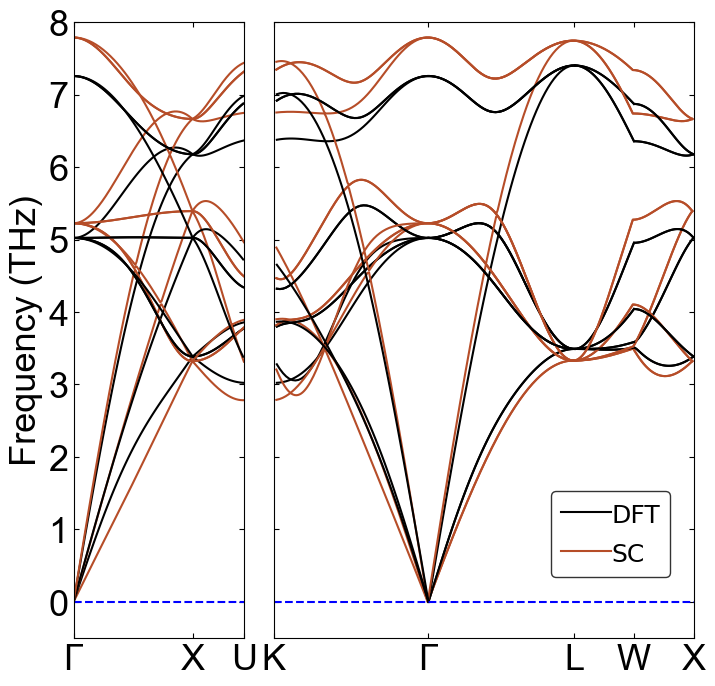

In [16]:
from scipy.interpolate import interp1d

mean_absolute_distance = 0
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (8,8), sharey=True, gridspec_kw={'width_ratios': [1, 2.46]})
for phonons_tar,  phonons_SR in zip(y_tar.T,  y_SR.T):
    
    tar_plot= ax1.plot(x_tar[:np.where(x_tar < 1.225026926)[-1][-1]], phonons_tar[:np.where(x_tar < 1.225026926)[-1][-1]],'k') 
    tar_plot2= ax1.plot(x_tar[np.where(x_tar < 1.225026926)[-1][-1]+1:np.where(x_tar < 1.755479145)[-1][-1]], phonons_tar[np.where(x_tar < 1.225026926)[-1][-1]+1:np.where(x_tar < 1.755479145)[-1][-1]],'k')
    tar_plot3= ax2.plot(x_tar[np.where(x_tar > 1.7554791448317695)[-1][1]:np.where(x_tar < 3.877288021)[-1][-1]], phonons_tar[np.where(x_tar > 1.7554791448317695)[-1][1]:np.where(x_tar < 3.877288021)[-1][-1]],'k')
    tar_plot4= ax2.plot(x_tar[np.where(x_tar < 3.877288021)[-1][-1]:np.where(x_tar < 5.377633466)[-1][-1]], phonons_tar[np.where(x_tar < 3.877288021)[-1][-1]:np.where(x_tar < 5.377633466)[-1][-1]],'k')
    tar_plot5= ax2.plot(x_tar[np.where(x_tar <  5.377633466)[-1][-1]+1:np.where(x_tar < 5.990146929)[-1][-1]], phonons_tar[np.where(x_tar < 5.377633466)[-1][-1]+1:np.where(x_tar < 5.990146929)[-1][-1]],'k')
    tar_plot5= ax2.plot(x_tar[np.where(x_tar <  5.990146929)[-1][-1]+1:], phonons_tar[np.where(x_tar < 5.990146929)[-1][-1]+1:],'k')
    
    SR_plot = ax1.plot(x_SR[:np.where(x_SR < 1.755479145)[-1][-1]], phonons_SR[:np.where(x_SR < 1.755479145)[-1][-1]], '#B64D28')
    SR_plot2 = ax2.plot(x_SR[np.where(x_SR > 2.285931364)[-1][1]:], phonons_SR[np.where(x_SR > 2.285931364)[-1][1]:], '#B64D28')
    x1 = x_tar[:np.where(x_tar > 1.755479145)[-1][-1]]
    x2 =  x_tar[:np.where(x_tar > 1.755479145)[-1][-1]]
    interp_func1 = interp1d(x_SR[:np.where(x_SR < 1.755479145)[-1][-1]], phonons_SR[:np.where(x_SR < 1.755479145)[-1][-1]], kind='linear', fill_value='extrapolate')
    interp_func2 = interp1d(x_tar[:np.where(x_tar < 1.755479145)[-1][-1]], phonons_tar[:np.where(x_tar < 1.755479145)[-1][-1]], kind='linear', fill_value='extrapolate')

# Define the common x-values for resampling
    common_x = np.arange(min(min(x1), min(x2)), max(max(x1), max(x2)), 1)

# Resample both graphs using the common x-values
    resampled_y1 = interp_func1(common_x)
    resampled_y2 = interp_func2(common_x)

# Calculate the mean absolute distance
    mean_absolute_distance += np.mean(np.abs(resampled_y1 - resampled_y2))

    
    
    plt.ylim(-0.5,8)
ax1.set_ylabel('Frequency (THz)')
print("Mean Absolute Distance:", mean_absolute_distance/12)

positions = [2.2859313638632646,3.877288021,5.377633466,5.990146929,6.602660391]
labels = ["\u039A","\u0393","L","W","\u03A7"]
positions2 = [0,1.225026926,1.755479145]
labels2 = ["\u0393","\u03A7","U"]
ax1.set_xticks(positions2)
ax1.set_xticklabels(labels2)
ax2.set_xticks(positions)
ax2.set_xticklabels(labels)
ax2.set_xlim(2.285931364,6.602660391)
ax1.set_xlim(0,1.755479145)
ax1.tick_params(axis='both', direction='in', top=True, right=True)
ax2.tick_params(axis='both', direction='in', top=True, right=True)
ax1.axhline(0, color='blue', linestyle='--')
ax2.axhline(0, color='blue', linestyle='--')

SR_plot2[0].set_label('SC')
tar_plot5[0].set_label('DFT')
#SC_plot2[0].set_label('SR 2')
#SC_Plot2[0].set_label('SP 1')
leg = plt.legend(loc=(0.66,0.1), prop={'size': 18},  frameon=True, handleheight=1.25, handletextpad=0.01)
plt.subplots_adjust(wspace=0.1)

leg.get_frame().set_edgecolor('black')
    
for axs in plt.gcf().get_axes():
        set_font(axs)
#plt.show()
plt.savefig("Phonon_SR.png", format='png', dpi=320, bbox_inches='tight')

In [12]:
for q in x_tar:
    print(q)
print(x_tar)
position = np.where(x_tar == 1.225026925800272)

0.0
0.02450053851600544
0.04900107703201088
0.07350161554801632
0.09800215406402175
0.1225026925800272
0.14700323109603264
0.1715037696120381
0.1960043081280435
0.22050484664404893
0.2450053851600544
0.26950592367605986
0.2940064621920653
0.3185070007080707
0.3430075392240762
0.3675080777400816
0.392008616256087
0.41650915477209244
0.44100969328809786
0.4655102318041033
0.4900107703201088
0.5145113088361142
0.5390118473521197
0.5635123858681251
0.5880129243841306
0.612513462900136
0.6370140014161414
0.6615145399321469
0.6860150784481523
0.7105156169641577
0.7350161554801632
0.7595166939961685
0.784017232512174
0.8085177710281796
0.8330183095441849
0.8575188480601902
0.8820193865761957
0.9065199250922013
0.9310204636082066
0.9555210021242121
0.9800215406402176
1.004522079156223
1.0290226176722284
1.053523156188234
1.0780236947042394
1.1025242332202447
1.1270247717362503
1.1515253102522556
1.176025848768261
1.2005263872842664
1.225026925800272
1.225026925800272
1.2356359701809019
1.24624